## **Laboratório de Regressão Linear com Python**

A regressão linear simples é uma técnica estatística utilizada para modelar a relação entre uma variável dependente e uma variável independente. Neste laboratório, você irá explorar a implementação da regressão linear simples utilizando dois métodos: o método dos mínimos quadrados e a biblioteca de machine learning scikit-learn. O objetivo é entender como a regressão linear pode ser aplicada para prever valores e analisar a relação entre variáveis.

Ao final deste laboratório, espera-se que você:


* Tenha uma compreensão sólida dos conceitos de regressão linear simples e sua aplicação prática.
* Seja capaz de implementar a regressão linear simples utilizando o método dos mínimos quadrados em Python.
* Tenha experiência em utilizar a biblioteca scikit-learn para realizar análises de regressão.
* Seja capaz de interpretar os resultados da regressão e discutir a relação entre as variáveis analisadas.
* Produza um relatório que documente suas descobertas, incluindo gráficos, equações e interpretações dos resultados.

### **Regressão Linear**

Em diversas áreas, como medicina, biologia, indústria, química, finanças e engenharia, é de grande interesse verificar se duas ou mais variáveis estão relacionadas de alguma forma. Para expressar essa relação, é fundamental estabelecer um modelo matemático. Esse tipo de modelagem ajuda a entender como determinadas variáveis influenciam outras, ou seja, analisa como o comportamento de uma ou mais variáveis pode afetar o comportamento de outra.

A regressão linear é uma técnica que auxilia na previsão do valor de uma variável desconhecida ($Y$) com base em um valor conhecido ($X$). Um exemplo prático seria: “Qual é o preço de uma casa com base em seu número de quartos?”

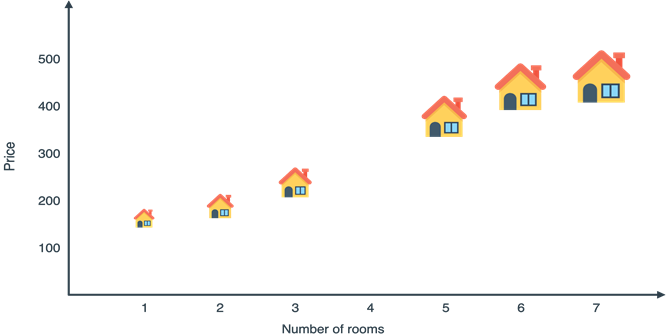

Neste caso, o preço é a variável que desejamos prever, utilizando o tamanho da casa como referência.

Para resolver esse problema, precisaríamos coletar dados históricos sobre tamanhos e preços de casas, treinar um modelo para aprender a relação matemática entre esses dados e, em seguida, fazer previsões de preços com base em outros tamanhos de casas. Como estamos analisando dados históricos para estimar um novo preço, isso se configura como um problema de regressão. A relação linear entre preço e tamanho (ou seja, quanto maior o tamanho da casa, maior o preço) caracteriza este como um problema de regressão linear.

O modelo de regressão linear assume que a relação entre as variáveis $Y$ e $X$
 é dada por:

 $$
 Y = \beta_0 + \beta_1 X + \epsilon
 $$

 em que $\beta_0$ e $\beta_1$ são os parâmetros do modelo e $\epsilon$
 é um termo aleatório.

 <img src="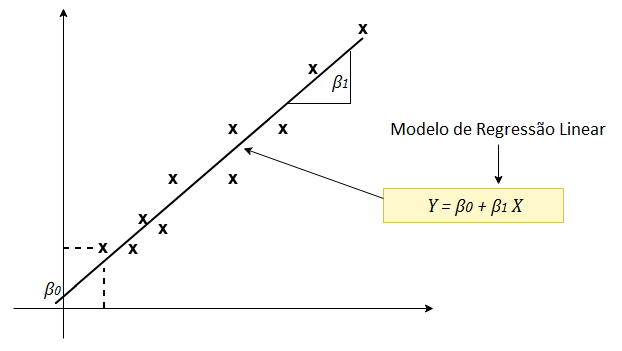
 " alt="imagem" width="400" height="220">

Se conhecermos $\beta_0$ e $\beta_1$ , basta utilizar o modelo de regressão linear para um determinado valor de $X$, digamos $x_1$, e saberemos o valor esperado de $Y$ dado $x_1$.

Infelizmente, nunca conhecemos $\beta_0$ e $\beta_1$ e então precisamos estimar esses valores utilizando os dados da nossa amostra.

Para encontrar os parâmetros ( $\beta_0$ ) e ( $\beta_1$ ), temos dois métodos:

* Método dos Mínimos Quadrados: Este método utiliza uma equação para calcular ( $\beta_0$ ) e outra equação para calcular ( $\beta_1$ ).

* Método de Machine Learning: Este método encontra ( $\beta_0$ ) e ( $\beta_1$ ) considerando várias possíveis variáveis de forma interessante, utilizando técnicas de otimização.

---
Gerando dados fictícios para o número de quartos (X) e preço da casa (Y)

num_quartos:  [5 1 4 4 4 2 4 3 5 1 1 5 3 2 1 2 2 1 2 5 4 1 4 1 3 4 1 2 4 4]
preco_casa:  [211682.7  89471.9 180854.9 193822.2 165939.8 112664.5 156442.9 138859.
 191557.7  87056.4  76012.1 191728.  135842.6 104754.9  88131.  107707.5
 131617.2  70430.7 110673.1 202065.  165431.2  69400.2 176149.6  94296.6
 137880.5 169196.6  84054.  111186.1 182544.1 184191. ]


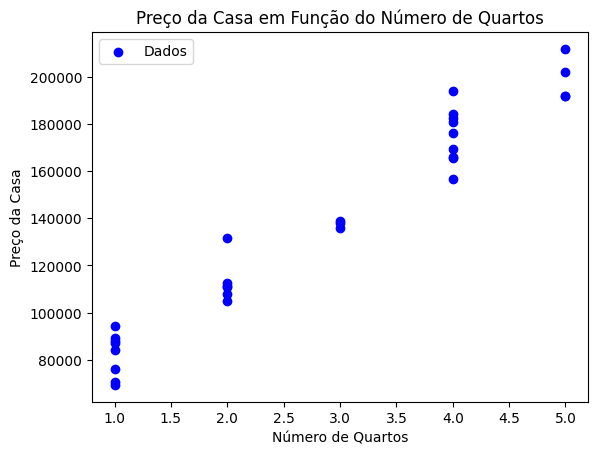

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Para reprodutibilidade
num_quartos = np.random.randint(1, 6, size=30)  # 1 a 5 quartos
preco_casa = 50000 + (num_quartos * 30000) + np.random.normal(0, 10000, size=30).round(1)  # Preço com um pouco de ruído
print("num_quartos: ", num_quartos)
print("preco_casa: ", preco_casa)

# Visualizando os dados e a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

### **1- Método dos Mínimos Quadrados**

A equação para calcular ( $\beta_1$ ) (o coeficiente angular, inclinação da reta) é:

$$
\beta_1 = \frac{\sum (x_i - \bar{X})(y_i - \bar{Y})}{\sum (x_i - \bar{X})^2}
$$

A fórmula para calcular ( $\beta_1$ ) (o coeficiente linear, intercessão com eixo $y$) é:

$$
\beta_0 = \bar{Y} - \beta_1 \bar{X}
$$

Onde:

* $x_i$ e $y_i$ são os valores das variáveis independentes e dependentes, respectivamente.

* $\bar{X}$ é a média dos valores de ( $X$ ).

* $\bar{Y}$ é a média dos valores de ( $Y$ ).

In [2]:
def calcular_beta1(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_bar = np.mean(x)
    y_bar = np.mean(y)

    beta1_numerador = np.sum((x - x_bar) * (y - y_bar))
    beta1_denominador = np.sum((x - x_bar) ** 2)
    beta1 = beta1_numerador / beta1_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    beta0 = y_bar - b1 * x_bar
    return beta0.round(1)

Executando com os valores $X$ como número de quartos e $Y$ como preço da casa

In [3]:
# Calculando Beta1 e Beta0
beta1 = calcular_beta1(num_quartos, preco_casa)
beta0 = calcular_beta0(num_quartos, preco_casa, beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")

Beta0: 52649.4 
Beta1: 29907.8


Assim,
 $$
 \text{preço_casa} = \beta_0 + \beta_1 \ \text{num_quartos}
 $$

 $$
 \text{preço_casa} = 52649.4 + 29907.8 \ \text{num_quartos}
 $$

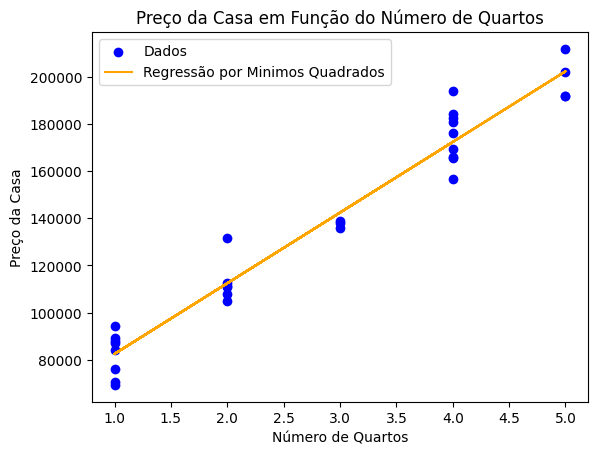

In [4]:
# Visualizando os dados e a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.plot(num_quartos, beta0 + beta1 * num_quartos, color='orange', label='Regressão por Minimos Quadrados')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

### **2- Método de Machine Learning**

Aplicando todos os conceitos e fórmulas que discutimos anteriormente, vamos utilizar o Python e sua poderosa biblioteca para machine learning, o scikit-learn. Mas o que é o scikit-learn?

Essa biblioteca oferece um conjunto de ferramentas para pré-processamento de dados e modelos de aprendizado de máquina, incluindo a regressão linear, que está disponível no módulo `linear_model`, juntamente com outros modelos lineares.

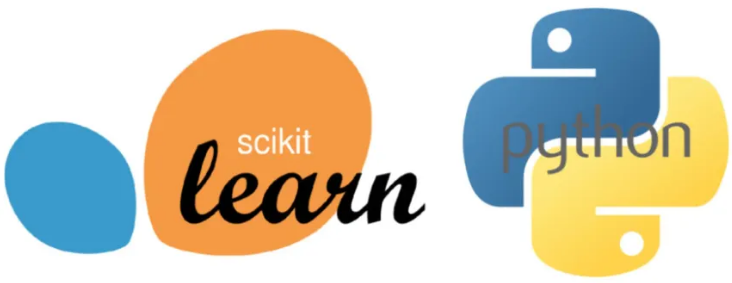

É possível, com base em características (`features` ou `input` ou variáveis independentes, representadas por ( $x$ )), fazer previsões sobre o alvo (`target` ou `output` ou variável dependente, representada por ( $y$ )).

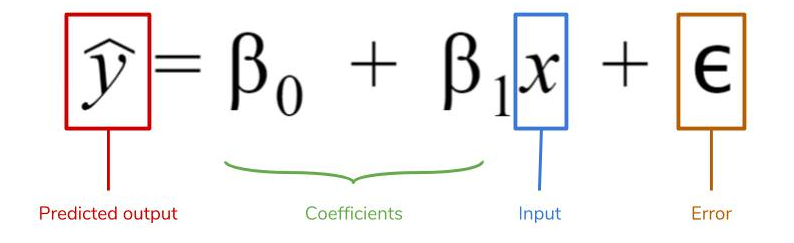

Lembre-se de que uma variável dependente é o valor que estamos prevendo, enquanto uma variável independente é aquela que utilizamos para prever a variável dependente.

Para encontrar $\beta_0$ e $\beta_1$, o modelo de regressão linear irá testar várias combinações possíveis de parâmetros (ou seja, $\beta_0$ e $\beta_1$). A cada iteração, o modelo otimiza a regressão, conforme ilustrado na imagem a seguir.

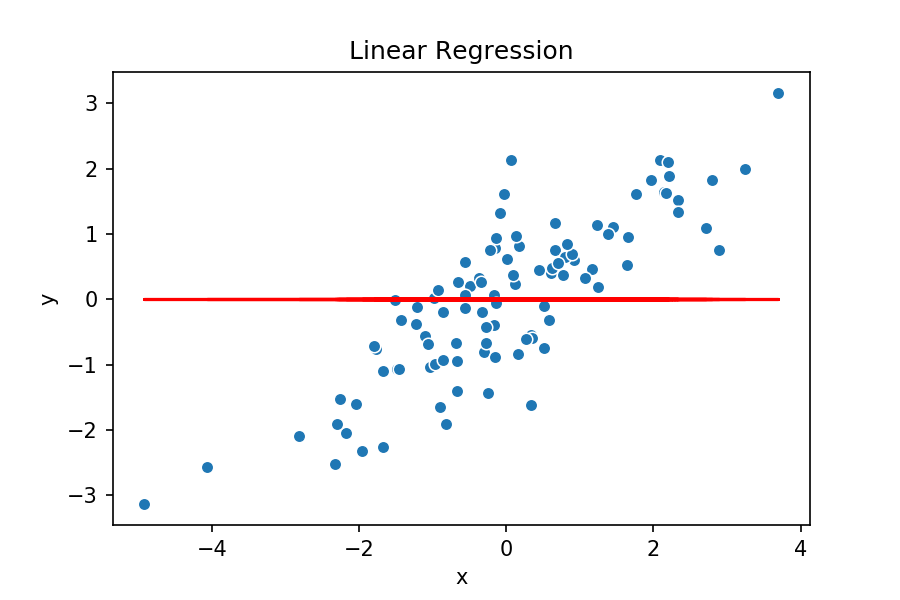

#### **Implementando Regressão Linear**

O método `.fit` é utilizado para treinar o modelo com os dados de entrada (variáveis independentes, `input`) e os dados de saída (variáveis dependentes, `output`). Durante esse processo, o modelo ajusta os parâmetros $\beta_0$ e $\beta_1$ para minimizar a diferença entre as previsões do modelo e os valores reais.

O método `.predict` é utilizado para fazer previsões com o modelo treinado. Ele recebe como entrada um conjunto de dados (variáveis independentes, `input`) e retorna as previsões correspondentes (variáveis dependentes, `output`). O modelo utiliza os parâmetros ajustados durante o treinamento para calcular as previsões.

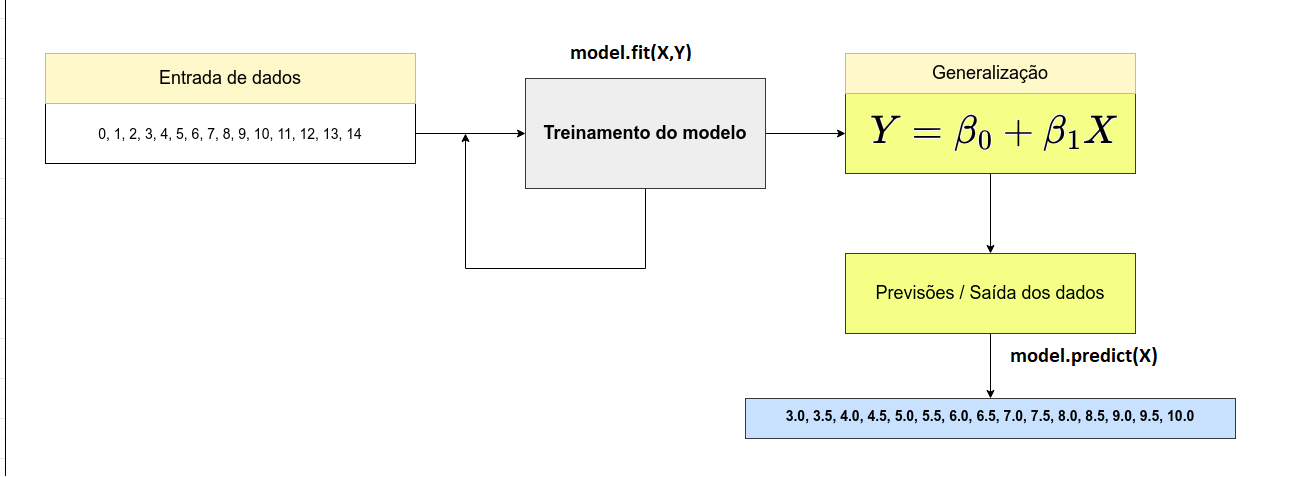

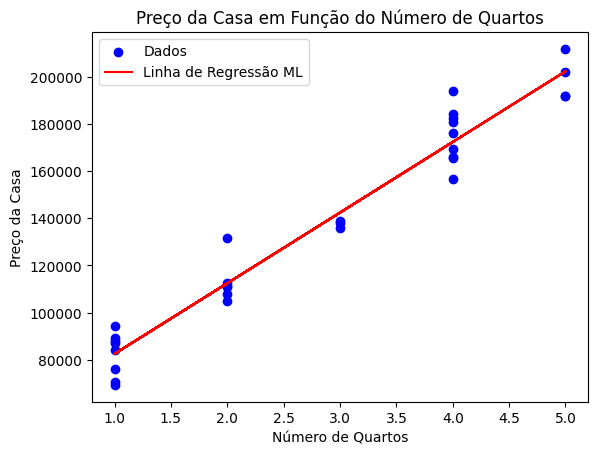



Equação da Regressão: preço_casa = 52649.3 + 29907.8 * num_quartos
beta_0:  52649.3
beta_1:  29907.8


In [5]:
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(num_quartos).reshape(-1,1), y=np.array(preco_casa))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.plot(num_quartos, model.predict(np.array(num_quartos).reshape(-1, 1)), color='red', label='Linha de Regressão ML')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: preço_casa = {beta_0:.1f} + {beta_1:.1f} * num_quartos")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))

Com o modelo de regressão linear simples (MRLS), predecir o preço da casa quando o numero de quartos sejam 7 e 10.

Com o número de quartos 7 e 10, os preço da casa é:  [262004.12975871 351727.64718499]


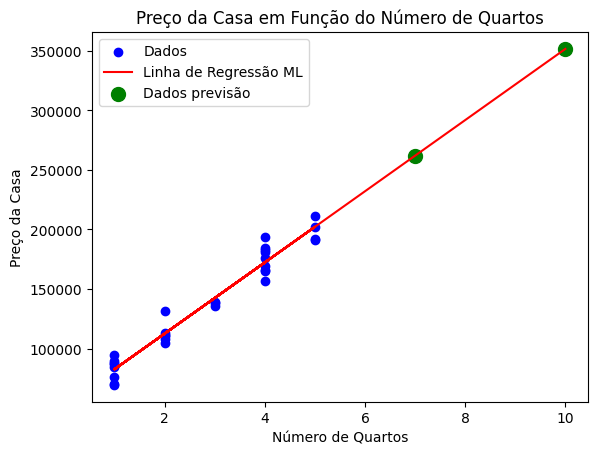

In [6]:
num_quartos_predecir = np.array([7,10])
predecir = model.predict(num_quartos_predecir.reshape(-1,1))
print("Com o número de quartos 7 e 10, os preço da casa é: ", predecir)

all_data = np.concatenate((num_quartos,num_quartos_predecir))

# Plotar a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='red', label='Linha de Regressão ML')
plt.scatter(num_quartos_predecir, predecir, color='green', label='Dados previsão', s=100)
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()


----
### **T1: Análise da Idade da árvore vs Diâmetro do tronco**

Você trabalha com pesquisa ambiental e precisa estimar a idade de árvores em uma floresta apenas medindo o diâmetro do tronco. Como nem sempre é possível contar os anéis do tronco, usamos modelos estatísticos para prever a idade a partir dessas medidas. Nesta tarefa, você vai aprender a fazer uma regressão linear para entender como o diâmetro do tronco cresce com o tempo, lidando também com a variabilidade que aparece nos dados reais — algo comum em fenômenos naturais.

Dados:

Você possui um conjunto de dados com as seguintes informações:

* Idade da Árvore (anos): Representa o número de anos desde que a árvore começou a crescer. É a variável independente (entrada) do modelo, usada para estimar o crescimento ao longo do tempo.


* Diâmetro do Tronco (cm):  Mede a largura do tronco da árvore em centímetros, geralmente obtida medindo a circunferência e convertendo para diâmetro. É a variável dependente (saída) que queremos prever a partir da idade.

Os dados estão organizados em duas colunas, onde cada linha representa um apartamento.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(123)

# 1. Idade vs Diâmetro do tronco (em cm)
idades = np.random.uniform(1, 100, 100)
# Ruído proporcional ao valor (±10% do valor esperado)
ruido_diametro = np.random.normal(0, 0.1 * 0.5 * idades)
diametro = 0.5 * idades + ruido_diametro

print("Idades da árvore: ", idades)
print("Diametro da árvore: ", diametro)

Idades da árvore:  [69.95044937 29.32779416 23.4582939  55.58016214 72.22742801 42.88753955
 98.09565564 68.79814412 48.61225825 39.8196343  34.9746236  73.17592103
 44.41865222  6.90811176 40.40638128 74.06154517 19.06668131 18.36972386
 53.62358601 53.65093112 63.8056949  85.09374761 72.72107716 61.49132756
 72.52189487 32.97293247 36.81707691 23.59805986 30.07769059 63.46663626
 10.11838905 43.9364161  43.65541357 49.87482467 43.15719874 31.91386107
 43.20877939 89.44552715 94.4718418  50.68183091 62.77134223 12.44622111
 32.4112627  42.06779498 86.76460663 25.79508117 48.82039216 98.57041878
 52.42902681 61.67655805 12.94223793 82.80773925 60.70295271 54.96173264
 34.93361954 31.10795811 42.28519889 68.44877581 87.67022734 51.53181141
 67.26206451 59.0077187  62.86544671 67.79421605 84.39190132  9.23630384
 76.6046013  25.12297108 20.2280731  57.67323879 10.47553914 88.6473558
 63.09764823 72.61821946  2.59679146 59.84875607 56.12173405 16.73700477
 16.153981   69.85742335 32.55787

**T1-a:** Criar o gráfico de dispersão para visualizar a posição dos pontos.

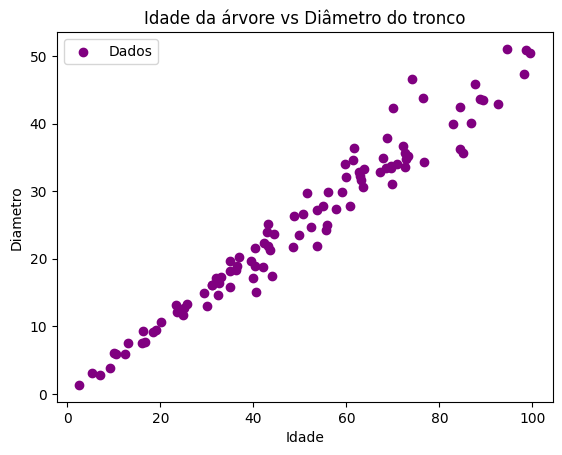

In [9]:
######### YOUR CODE HERE ##########
plt.scatter(idades, diametro, color='purple', label='Dados')
plt.xlabel('Idade')
plt.ylabel('Diametro')
plt.title('Idade da árvore vs Diâmetro do tronco')
plt.legend()
plt.show()



**T1-b:** Criar o modelo de regressão linear simples (MRLS).

Ou seja, substitua as variáveis $X$ e $Y$ na equação $Y = \beta_0 + \beta_1 \ X$ pelos nomes das variáveis que você está utilizando. Por exemplo: $\text{preço_do_carro} = \beta_0 + \beta_1 \ \text{tempo_de_uso}$

Escreva Aqui:

diametro = β0+β1 idades

**T1-c:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método dos mínimos quadrados. Mostrar o gráfico.

Beta0: 0.0 
Beta1: 0.5


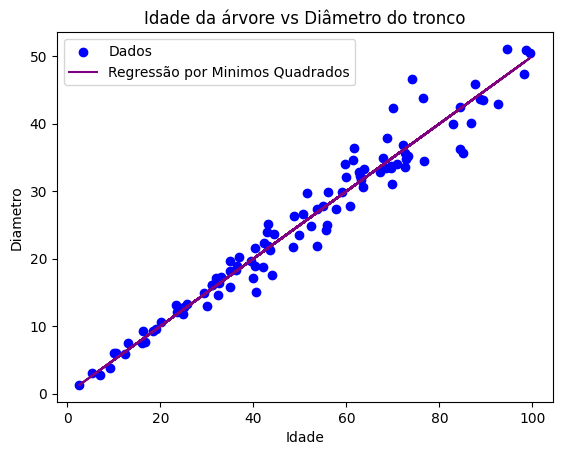

In [12]:
######### YOUR CODE HERE ##########
def calcular_beta1(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_bar = np.mean(x)
    y_bar = np.mean(y)

    beta1_numerador = np.sum((x - x_bar) * (y - y_bar))
    beta1_denominador = np.sum((x - x_bar) ** 2)
    beta1 = beta1_numerador / beta1_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    beta0 = y_bar - b1 * x_bar
    return beta0.round(1)

    # Calculando Beta1 e Beta0
beta1 = calcular_beta1(idades, diametro)
beta0 = calcular_beta0(idades, diametro, beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")

# Visualizando os dados e a linha de regressão
plt.scatter(idades, diametro, color='blue', label='Dados')
plt.plot(idades, beta0 + beta1 * idades, color='Purple', label='Regressão por Minimos Quadrados')
plt.xlabel('Idade')
plt.ylabel('Diametro')
plt.title('Idade da árvore vs Diâmetro do tronco')
plt.legend()
plt.show()



**T1-d:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método de machine learning. Mostrar o gráfico.

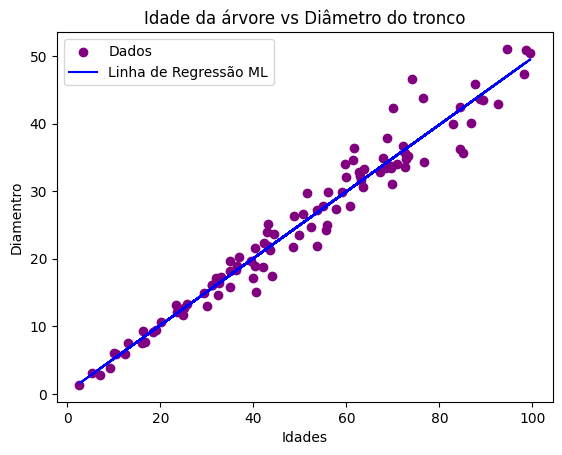



Equação da Regressão: idades = 0.3 + 0.5 * diametro
beta_0:  0.3
beta_1:  0.5


In [15]:
######### YOUR CODE HERE ##########
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(idades).reshape(-1,1), y=np.array(diametro))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(idades, diametro, color='Purple', label='Dados')
plt.plot(idades, model.predict(np.array(idades).reshape(-1, 1)), color='blue', label='Linha de Regressão ML')
plt.xlabel('Idades')
plt.ylabel('Diamentro')
plt.title('Idade da árvore vs Diâmetro do tronco')
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: idades = {beta_0:.1f} + {beta_1:.1f} * diametro")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))

**T1-e:** Prever, com o modelo de machine learning, o diametro da árvore para idades de $5$, $20$, $50$, $75$ e $100$ anos.
Mostrar o gráfico e imprimir a previsão.

Com a idade de 5, 20, 50, 75 e 100, os diametro da arvore é:  [ 2.73603736 10.16126885 25.01173181 37.38711761 49.76250342]


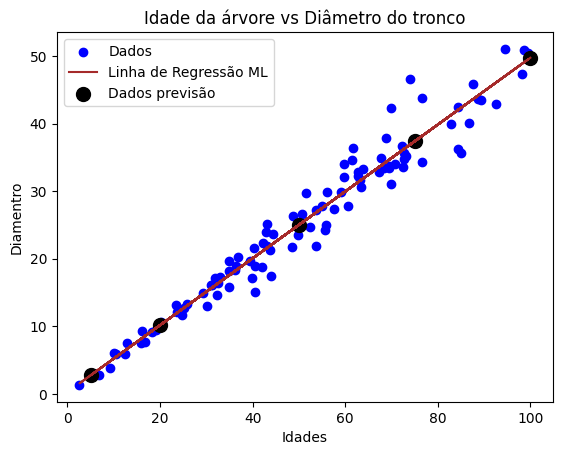

In [16]:
######### YOUR CODE HERE ##########
idades_predecir = np.array([5,20,50,75,100])
predecir = model.predict(idades_predecir.reshape(-1,1))
print("Com a idade de 5, 20, 50, 75 e 100, os diametro da arvore é: ", predecir)

all_data = np.concatenate((idades,idades_predecir))

# Plotar a linha de regressão
plt.scatter(idades, diametro, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='brown', label='Linha de Regressão ML')
plt.scatter(idades_predecir, predecir, color='black', label='Dados previsão', s=100)
plt.xlabel('Idades')
plt.ylabel('Diamentro')
plt.title('Idade da árvore vs Diâmetro do tronco')
plt.legend()
plt.show()

### **T2: Análise do Velocidade do vento vs Altura da onda no mar**

Em estudos oceanográficos, a previsão da altura das ondas é fundamental para segurança e planejamento de atividades marítimas. A altura das ondas costuma depender da velocidade do vento que sopra sobre o mar. Nesta tarefa, você vai analisar dados que refletem essa relação para construir um modelo de regressão linear que ajude a prever a altura das ondas com base na velocidade do vento, considerando também o ruído ou variabilidade natural desses fenômenos.

Dados:

Você possui um conjunto de dados com as seguintes informações:

* Velocidade do Vento (m/s): É a velocidade média do vento medida em metros por segundo na superfície do mar. Variável independente que influencia a formação das ondas.


* Altura da Onda (m):  É a altura média das ondas no mar, medida em metros, que aumenta conforme a velocidade do vento. Variável dependente que queremos prever.

Os dados estão organizados em duas colunas, onde cada linha representa um dia.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a semente para reprodutibilidade
np.random.seed(123)

# 2. Velocidade do vento vs Altura da onda (em metros)
velocidade_vento = np.random.uniform(1, 30, 100)
# Ruído proporcional: desvio padrão = 20% do valor esperado
ruido_altura = np.random.normal(0, 0.2 * 0.3 * velocidade_vento)
altura_onda = 0.3 * velocidade_vento + ruido_altura

print("Velocidade do vento: ", velocidade_vento)
print("Altura da onda: ", altura_onda)

Velocidade do vento:  [21.19760638  9.29804071  7.57869215 16.9881283  21.86460012 13.27008734
 29.44216175 20.86006242 14.94702514 12.37140803 10.95216247 22.14244151
 13.7185951   2.730659   12.5432834  22.40186677  6.29226018  6.08810093
 16.41498984 16.42300003 19.3976278  25.63352203 22.00920442 18.71968181
 21.95085809 10.3658085  11.49187101  7.6196337   9.51770735 19.29830759
  3.67104326 13.57733401 13.49502014 15.31686783 13.34907842 10.05557547
 13.3641879  26.90828573 28.38064053 15.5532636  19.0946356   4.35293346
 10.20127897 13.02996015 26.12296558  8.2632056  15.00799366 29.58123378
 16.06506846 18.77394125  4.49823131 24.96388321 18.48874372 16.80697219
 10.94015118  9.81950288 13.09364412 20.75772221 26.38824841 15.80224779
 20.41009971 17.99216002 19.12220156 20.56598248 25.42793069  3.41265466
 23.1468024   8.06632486  6.63246586 17.60125177  3.77566298 26.67447796
 19.19022019 21.97907439  1.46774699 18.2385245  17.14677058  5.60982968
  5.43904494 21.17035633 10.2

**T2-a:** Criar o gráfico de dispersão para visualizar a posição dos pontos.

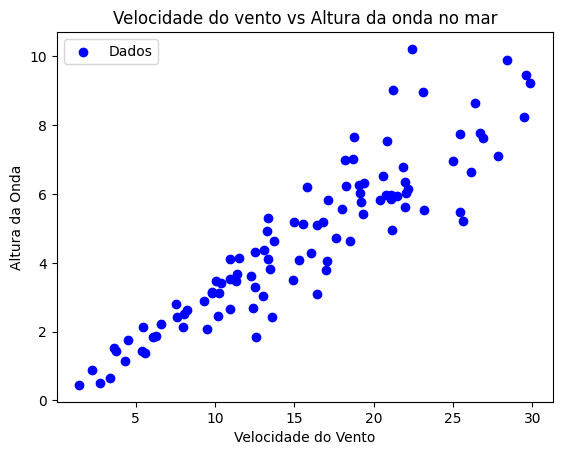

In [18]:
######### YOUR CODE HERE ##########
plt.scatter(velocidade_vento, altura_onda, color='blue', label='Dados')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Altura da Onda')
plt.title('Velocidade do vento vs Altura da onda no mar')
plt.legend()
plt.show()

**T2-b:** Criar o modelo de regressão linear simples (MRLS).

Ou seja, substitua as variáveis $X$ e $Y$ na equação $Y = \beta_0 + \beta_1 \ X$ pelos nomes das variáveis que você está utilizando. Por exemplo: $\text{preço_do_carro} = \beta_0 + \beta_1 \ \text{tempo_de_uso}$

Escreva aqui:
Altura da Onda = β0+β1 Velocidade do Vento

**T2-c:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método dos mínimos quadrados. Mostrar o gráfico.

Beta0: 0.0 
Beta1: 0.3


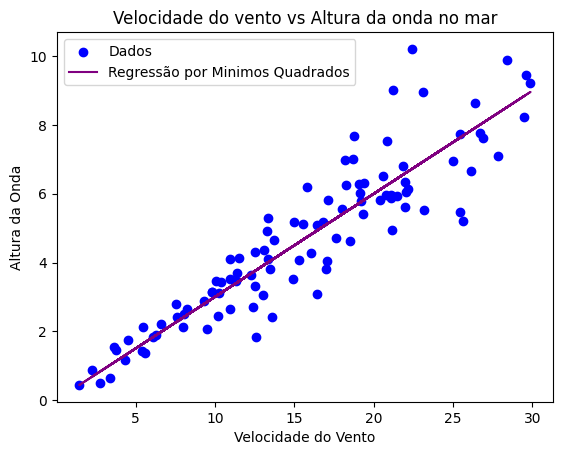

In [21]:

######### YOUR CODE HERE ##########
def calcular_beta1(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_bar = np.mean(x)
    y_bar = np.mean(y)

    beta1_numerador = np.sum((x - x_bar) * (y - y_bar))
    beta1_denominador = np.sum((x - x_bar) ** 2)
    beta1 = beta1_numerador / beta1_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    beta0 = y_bar - b1 * x_bar
    return beta0.round(1)

    # Calculando Beta1 e Beta0
beta1 = calcular_beta1(velocidade_vento, altura_onda)
beta0 = calcular_beta0(velocidade_vento, altura_onda, beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")

# Visualizando os dados e a linha de regressão
plt.scatter(velocidade_vento, altura_onda, color='blue', label='Dados')
plt.plot(velocidade_vento, beta0 + beta1 * velocidade_vento, color='Purple', label='Regressão por Minimos Quadrados')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Altura da Onda')
plt.title('Velocidade do vento vs Altura da onda no mar')
plt.legend()
plt.show()



**T2-d:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método de machine learning. Mostrar o gráfico.

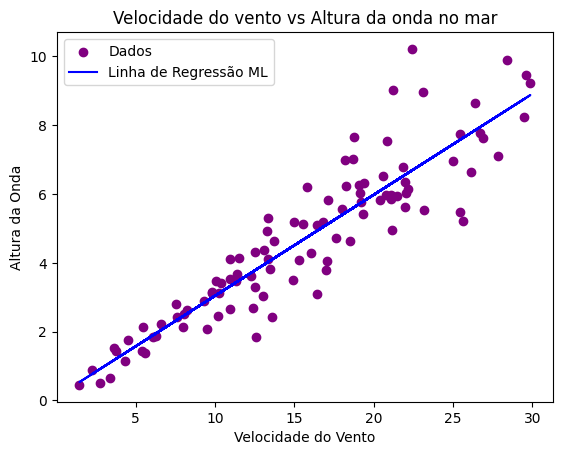



Equação da Regressão: velocidade_vento = 0.1 + 0.3 * altura_onda
beta_0:  0.1
beta_1:  0.3


In [22]:
######### YOUR CODE HERE ##########
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(velocidade_vento).reshape(-1,1), y=np.array(altura_onda))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(velocidade_vento, altura_onda, color='Purple', label='Dados')
plt.plot(velocidade_vento, model.predict(np.array(velocidade_vento).reshape(-1, 1)), color='blue', label='Linha de Regressão ML')
c
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: velocidade_vento = {beta_0:.1f} + {beta_1:.1f} * altura_onda")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))

**T2-e:** Prever, com o modelo de machine learning, a altura da onde quando a velocidade do vento é $3$, $10$, $15$, $25$ e $30$.
Mostrar o gráfico e imprimir a previsão.

Com a velocidadde do vento em 3,10,15,25,30 a altura da onda é:  [0.98443906 3.03981357 4.50793821 7.44418751 8.91231215]


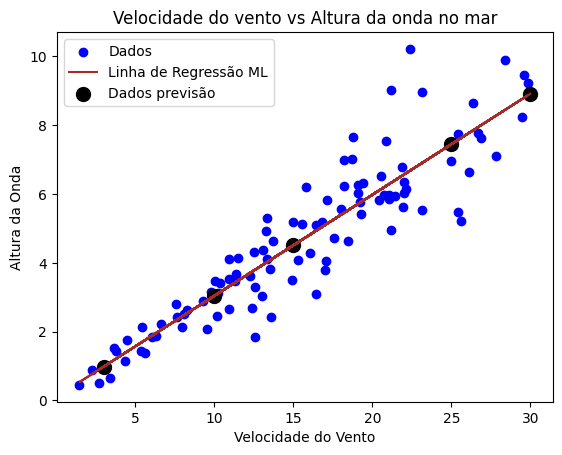

In [23]:

######### YOUR CODE HERE ##########
velocidade_vento_predecir = np.array([3,10,15,25,30])
predecir = model.predict(velocidade_vento_predecir.reshape(-1,1))
print("Com a velocidadde do vento em 3,10,15,25,30 a altura da onda é: ", predecir)

all_data = np.concatenate((velocidade_vento,velocidade_vento_predecir))

# Plotar a linha de regressão
plt.scatter(velocidade_vento, altura_onda, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='brown', label='Linha de Regressão ML')
plt.scatter(velocidade_vento_predecir, predecir, color='black', label='Dados previsão', s=100)
plt.xlabel('Velocidade do Vento')
plt.ylabel('Altura da Onda')
plt.title('Velocidade do vento vs Altura da onda no mar')
plt.legend()
plt.show()